# Homework 1 - Coding Theory
# Naiara Alonso Montes

### Problem 1

#### A

**a) Compute code rate**

The code-rate R is calculated with the following formula $R = \frac{\log_{|U|}M}{n} = \frac{k}{n}$ where $k$ is $\log_{2}M$ and $n$ is provided. I apply the formula:

$$R = \frac{k}{n} = \frac{\log_{2}8}{7} = \frac{3}{7}$$

**b) Minimun distance from the code**

To calculate the minimun distance, I will use the Hamming distance. It is necessary to transform the code words into strings.

In [ ]:
import numpy as np

codewords = np.array([
    [1, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1],
    [1, 1, 0, 1, 0, 1, 1],
    [0, 0, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 0, 0, 0, 0]])

hamming_weights = [np.sum(codeword) for codeword in codewords]

non_zero_weights = [weight for weight in hamming_weights if weight > 0]
min_distance = min(non_zero_weights)

print(f"The minimun distances is: {min_distance}")


The minimun distances is: 3


**c) Check if code is linear**

For a code to be linear, the result of the XOR of 2 codewords must be another codeword.

In [ ]:
from os import name
def xor(word1, word2):
    result = ""
    for i in range(len(word1)):
        if word1[i] == word2[i]:
            result += "0"
        else:
            result += "1"
    return result

def main():
  for i, word1 in enumerate(codewords):
    for j, word2 in enumerate(codewords):
      resulted_word = xor(word1, word2)
      if resulted_word not in codewords:
        print(f"The code is not linear")
        exit()
  print(f"The code is linear")

main()

The code is linear


#### B

**a) Parity-check matrix**
First I need to obtain the Identity Matrix, which is not trivial. Row 2 = Row 2 - Row 1

\begin{equation}
M' =
\begin{pmatrix}
  1 & 0 & 0 & 1 & 0 & 1 & 1  \\
  0 & 1 & 0 & 1 & 1 & 1 & 1  \\
  0 & 0 & 1 & 1 & 0 & 0 & 1  \\
\end{pmatrix}
\end{equation}

In matrix $M'$ the identity matrix $I_{3}$ has dimensions $3 \times 3$ and parity matrix $P$ has dimesions $3 × 4$. I need the transpose matrix $P'$.

\begin{equation}
P' =
\begin{pmatrix}
1 & 1 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0 \\
1 & 1 & 1 \\
\end{pmatrix}
\end{equation}

Now the parity-check matrix $H = [P' | I_{3}]$, which is:

\begin{equation}
H =
\begin{pmatrix}
1 & 1 & 1 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
\end{equation}

**b) Code rate**

Code rate $R$ is defined as in a generator matrix as $\frac{k}{n}$ where $k$ is equal to the number of rows of the matrix and $n$ is the number of columns. For our example:
$$R = \frac{k}{n} = \frac{3}{7} ≈ 0.429$$

**c) Minimun distance of the code**

In [ ]:
import numpy as np

generator_matrix = np.array([
    [1, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1]
])

all_binary_vectors = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

codewords = []
for vector in all_binary_vectors:
    codeword = np.dot(vector, generator_matrix) % 2
    codewords.append(codeword)

hamming_weights = [np.sum(codeword) for codeword in codewords]

non_zero_weights = [weight for weight in hamming_weights if weight > 0]
min_distance = min(non_zero_weights)

print(f"The minimun distance is: {min_distance}")


The minimun distance is: 3


**d) Check minimun distance using parity check**

To check the minimun distance using the parity check matrix, we need to sum all combinations of columns and see if the result is 0 in module 2. The number of 0 vectors is the minimun distance. The sum can be done with 2 or more columns.

In [ ]:
from itertools import combinations

H = np.array([
    [1, 1, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1]
])

n = H.shape[1]

def is_linearly_dependent(cols):
    col_sum = np.sum(cols, axis=1) % 2
    return np.array_equal(col_sum, np.zeros(cols.shape[0]))

min_distance = n
for r in range(2, n + 1):
    for comb in combinations(range(n), r):
        selected_columns = H[:, comb]
        if is_linearly_dependent(selected_columns):
            min_distance = min(min_distance, r)
            break

print(f"The minimun distance is: {min_distance}")


The minimun distance is: 3


**e) Decision region for 0-codeword**

To get the decision region for 0-codeword we need to compare it with all possible combinations of codewords. To do so, first we need to obtain all possible combinations and calculate the distance to 0-codeword.


In [ ]:
import numpy as np
import itertools
import pandas as pd

def binary_combinations(n):
  return np.array(list(itertools.product([0, 1], repeat=n)))

def hamming_distances():
  n_combinations = binary_combinations(7)
  codeword_0 = np.array([0] * n_combinations.shape[1])
  distances = np.sum(np.abs(n_combinations - codeword_0), axis=1)
  return distances

dataframe = pd.DataFrame({'Combination': binary_combinations(7).tolist(), 'Distance': hamming_distances()})
dataframe

,Combination,Distance
0,"[0, 0, 0, 0, 0, 0, 0]",0
1,"[0, 0, 0, 0, 0, 0, 1]",1
2,"[0, 0, 0, 0, 0, 1, 0]",1
3,"[0, 0, 0, 0, 0, 1, 1]",2
4,"[0, 0, 0, 0, 1, 0, 0]",1
...,...,...
123,"[1, 1, 1, 1, 0, 1, 1]",6
124,"[1, 1, 1, 1, 1, 0, 0]",5
125,"[1, 1, 1, 1, 1, 0, 1]",6
126,"[1, 1, 1, 1, 1, 1, 0]",6


We know that there exists a theorem that can correct $⌊(d - 1) / 2⌋$ errors. In our case, $d = 3$, so the number of corrected errors is $⌊(3 - 1) / 2⌋ = 1$. It means that for any vector which the distance is 1 or less, it belongs to the 0-codeword decision region.

In [ ]:
def decision_region(distances):
  decision_region_indexes = []
  for i, distance in enumerate(distances):
    if distance <= 1:
      decision_region_indexes.append(i)
  return decision_region_indexes

decision_region(hamming_distances())

dataframe.iloc[decision_region(hamming_distances())]

,Combination,Distance
0,"[0, 0, 0, 0, 0, 0, 0]",0
1,"[0, 0, 0, 0, 0, 0, 1]",1
2,"[0, 0, 0, 0, 0, 1, 0]",1
4,"[0, 0, 0, 0, 1, 0, 0]",1
8,"[0, 0, 0, 1, 0, 0, 0]",1
16,"[0, 0, 1, 0, 0, 0, 0]",1
32,"[0, 1, 0, 0, 0, 0, 0]",1
64,"[1, 0, 0, 0, 0, 0, 0]",1


#### C


## Problem 2

#### A

**a) Probability of excatly $e$ errors**

The probability of getting getting exactly $e$ errors can be explaines as follow:
- We the number of bits that are going to change can be defined as $\binom{n}{e}$.
- The probability of this bits to change and not the others is $p^{e}(1 - p)^{n - e}$.
So, the probability of getting exactly $e$ errors is:

$$\binom{n}{k}⋅p^{e}(1 - p)^{n - e}$$

**b) Probability of at least $e$ errors**

The probability of getting at least $e$ erros is the sum of the probabilities of getting $e$ errors or more.

$$P_{e \text{ or more errors}} = ∑_{i = e}^{n}\binom{n}{i}⋅p^{i}(1 - p)^{n - i}$$

**c) Decoding error probability of the ML decoder**

The repetition code can correct $⌊(n - 1) / 2⌋$ errors, so if number of errors is greater, the ML decoder will choose the wrong codeword. The probability of error in the ML decoder is the sum of probabilities that lead to that error. So:

$$P_{e \text{ in ML decoder}} = ∑_{i = \frac{n + 1}{2}}^{n}\binom{n}{i}⋅p^{i}(1 - p)^{n - i}$$

#### B
**a) Number of corrected erasures is granted?**

As we are dealing with a repetition code, the erasures can be easily detected and corrected by considering that there are no errors in the received codeword. Considering that, the number of corrected erasures is based on the distances, so:

$$\text{Corrected erasures} = d - 1$$
With $d$ being equal to the distance of the codewords.

#### C
**a) Correcting both errors and erasures probability**
The formula $2t + ρ \le d - 1$ ensures that there will be enough non-erased bits to correct errors.

All possible combinations for errors and erasures is given by the bynom $\binom{n}{i + j}$ where $i$ is the number of errors and $j$ the number of erasures.

The probabilities of $i$ errors and $j$ erasures is given by $p^{i}⋅ϵ^{j}\cdot(1 - p - ϵ)^{n - i -j}$ where $p$ is the error probability, $ϵ$ the erasure probability and $(1 - p - ϵ)^{n - i - j}$ the probability of error in the remaining bits

If we put it all together, we obtain the following formula:


$$P_{\text{error}} = ∑_{i = t}^{n - ρ} ∑_{j = 0}^{ρ}\binom{n}{i + j}⋅p^{i}\cdotϵ^{j}\cdot(1 - p - ϵ)^{n - i - j}$$
Where:
- $n$ is the codeword length
- $p$ is the error probability of the BCS
- $ϵ$ is the erasure probability of the BSC
- $t$ is the number of errors to be corrected
- $\binom{n}{i + j}$ represents the number of ways to choose $i + j$ errors or erasures out of $n$ bits
- $p^{i}⋅ϵ^{j}⋅(1 - p - ϵ)^{n- i - j}$ is the probability of $i$ errors and $j$ erasures ocurring

## Problem 3

#### A

**a) Error probability in BSC**

For case 1: transmitted bit is 0
- The received signal is $r = -\sqrt{E} + n$
- An error occurs is $r > 0$, which means $n > \sqrt{E}$
- The probability of error is $P(error|s0) = Q(\sqrt{\frac{E}{σ{2}}})$

For case 1: transmitted bit is 1
- The received signal is $r = \sqrt{E} + n$
- An error occurs is $r > 0$, which means $n > -\sqrt{E}$
- The probability of error is $P(error|s1) = Q(\sqrt{\frac{E}{σ{2}}})$

Since two cases are symetric:
$$P(error) = Q(\sqrt{\frac{E}{σ²}})$$


**b) Transition probability matrix**

The transition probability matrix $P$ is:
\begin{equation}
P =
\begin{pmatrix}
P(0|0) & P(0|1) \\
P(1|0) & P(1|1) \\
\end{pmatrix}
\end{equation}
Since the channels are symetric:
\begin{equation}
P =
\begin{pmatrix}
1 - P(error) & P(error) \\
P(error) & 1 - P(error) \\
\end{pmatrix}
\end{equation}

**c) Transition diagram**

I found the exact same transition diagram in [here](https://www.researchgate.net/figure/Bit-transition-graph-over-a-BSC-Each-bit-is-flipped-independently-of-other-bits-with-a_fig1_378506390).

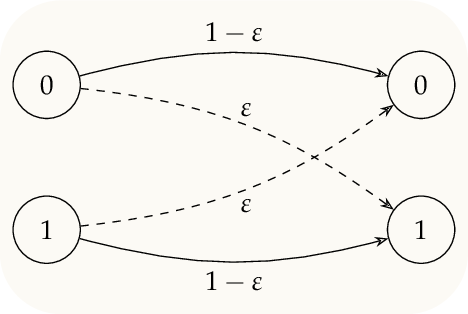



#### B

**a) Plot error probability**

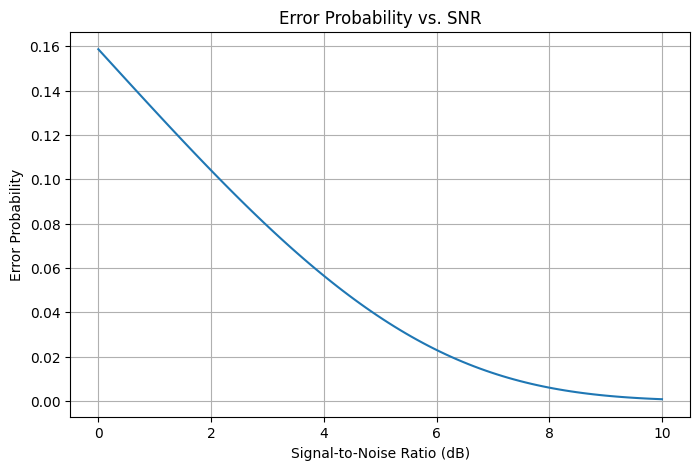

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the signal-to-noise ratio range
snr_db = np.linspace(0, 10, 100)
snr = 10**(snr_db/10)

# Calculate error probability
p_error = stats.norm.sf(np.sqrt(snr))

# Plot error probability vs. SNR
plt.figure(figsize=(8, 5))
plt.plot(snr_db, p_error)
plt.xlabel("Signal-to-Noise Ratio (dB)")
plt.ylabel("Error Probability")
plt.title("Error Probability vs. SNR")
plt.grid(True)

plt.show()

**b) Expression for the capacity of the BSC with error
probability $p$**

The capacity of a BSC with error probability $p$ is given by:

$$C = 1 - H(p)$$

Where $H(p)$ is the binary entropy function $-p⋅\log_{2}(p) - (1 - p)⋅\log_{2}(1 - p)$.

**c) Plotting capacity of BSC af funtion of $p$**

We can plot the capacity of the BSC by calculating $P(error)$ for different values of $\frac{E}{σ²}$ and the using it to calculate C. Here is the Python code:

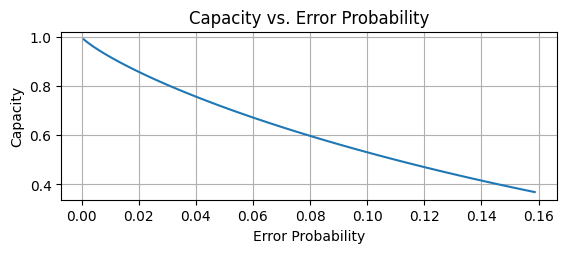

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate error probability
p_error = stats.norm.sf(np.sqrt(snr))  # taking SNR from previous example

# Calculate capacity
capacity = 1 - (-p_error*np.log2(p_error) - (1-p_error)*np.log2(1-p_error))

# Plot capacity vs. p
plt.subplot(2, 1, 2)
plt.plot(p_error, capacity)
plt.xlabel("Error Probability")
plt.ylabel("Capacity")
plt.title("Capacity vs. Error Probability")

plt.grid(True)
plt.show()

**d) Plotting capacity as SNR function**

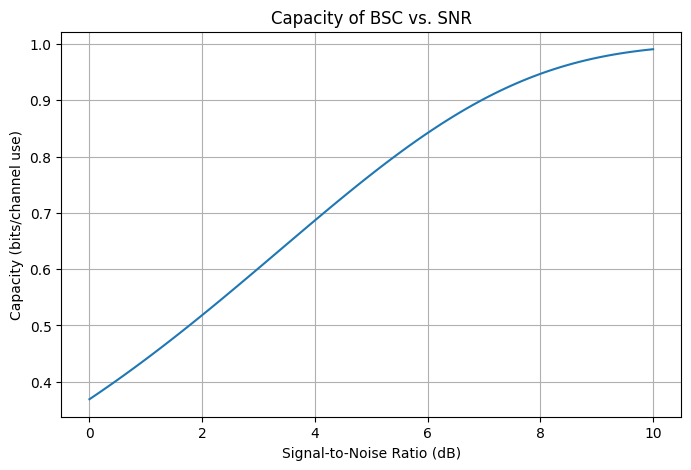

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot capacity vs SNR, all data as been previously computed
plt.figure(figsize=(8, 5))
plt.plot(snr_db, capacity)
plt.xlabel("Signal-to-Noise Ratio (dB)")
plt.ylabel("Capacity (bits/channel use)")
plt.title("Capacity of BSC vs. SNR")
plt.grid(True)

plt.show()

## Problem 4

#### A

**a) Find covering radius**

The covering radius is the maximun distance between all codewords. First we need to find all possible codewords and then calculate the maximun distance.

In [ ]:
import numpy as np

generator_matrix = np.array([
    [1, 0, 1, 1],
    [0, 1, 0, 1]
])

all_binary_vectors = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

codewords = []
for vector in all_binary_vectors:
    codeword = np.dot(vector, generator_matrix) % 2
    codewords.append(codeword)

hamming_weights = [np.sum(codeword) for codeword in codewords]

non_zero_weights = [weight for weight in hamming_weights if weight > 0]
max_distance = max(non_zero_weights)

print(f"The covering radius is: {max_distance}")

The covering radius is: 3


#### B

**a) How many correction of errors can be guaranteed?**

We can correct $⌊\frac{(d - 1)}{2}⌋$ errors, with $d$ equal to the minimun distance for the code.

In [ ]:
import numpy as np
import math

generator_matrix = np.array([
    [1, 1, 0, 0, 1, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 1]
])

all_binary_vectors = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

codewords = []
for vector in all_binary_vectors:
    codeword = np.dot(vector, generator_matrix) % 2
    codewords.append(codeword)

hamming_weights = [np.sum(codeword) for codeword in codewords]
non_zero_weights = [weight for weight in hamming_weights if weight > 0]

min_distance = min(non_zero_weights)

print(f"The minimun distance is: {min_distance}")
max_errors = math.floor((min_distance - 1) / 2)

print(f"The maximun number of corrected errors is: {max_errors}")

The minimun distance is: 2
The maximun number of corrected errors is: 0


**b) Maximal weight of the error pattern which can be solved by ML decoder**

The value of the maximal weight of error solved by ML decoder is the same as the maximun number of corrected erros, which in this case is equal to **0**.

#### C

**a) Systematic generator and parity check matrix for code length $n = 5$**

For a single parity-check code of length $n = 5$, the codeword consists of 4 information bits and 1 parity bit, leading to a $[5, 4]$ code, where $k = 4$ and $n = 5$.

The systematic generator matrix is:

\begin{equation}
G=
\begin{pmatrix}
  1 & 0 & 0 & 0 & 1 \\
  0 & 1 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0 & 1 \\
  0 & 0 & 0 & 1 & 1 \\
\end{pmatrix}
\end{equation}

- The first $k$ columns represent the identity matrix $I_{4}$.
- The last column adds the parity check bit to ensure that the sum is even.

The parity-check matrix is defined as $H = (-P^{T} I_{r})$, where $P^{T}$ is the transpose of $P$ and $I_{r}$ is the identity matrix of size $r × r$ (with $r = n - k$).

\begin{equation}
P^{T}=
\begin{pmatrix}
  1 & 1 & 1 & 1 \\
\end{pmatrix}
\end{equation}
\begin{equation}
I_{1} =
\begin{pmatrix}
1 \\
\end{pmatrix}
\end{equation}

As we are working in binary, the negation does not affect, so:
\begin{equation}
H=
\begin{pmatrix}
  1 & 1 & 1 & 1 & 1\\
\end{pmatrix}
\end{equation}

#### D

**a) Systematic generator and parity check matrix for Hamming code of length $n = 8$**

As wexare working with extended Hamming code, the original Hamming code has $n - 1 = 7$ bits. For the original Hamming code the matrix is:

\begin{equation}
H_7=
\begin{pmatrix}
0 & 0 & 0 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 1 \\
\end{pmatrix}
\end{equation}

An now wec extend it with 0s column am 1s row:

\begin{equation}
H_8=
\begin{pmatrix}
0 & 0 & 0 & 1 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 0 & 0 & 1 & 1 & 0\\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0\\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\
\end{pmatrix}
\end{equation}

The generator matrix $G$ is in the form $[I_k|P^T]$ where $I_k$ is thevidentity matrix of size $k\times k$, where
- $k= n - r - 1= 8-3-1=4$
- $P$ is the parity bit matrix from
From previous $H_7$ we can extract P as the most right part of $H$. So:

\begin{equation}
P^T =
\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
1 & 1 & 1 \\
\end{pmatrix}
\end{equation}


\begin{equation}
G =
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 1 & 1 \\
0 & 1 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 1 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 & 1 \\
\end{pmatrix}
\end{equation}

## Problem 5

A

**a) Construct the syndome table for the extended Hamming code of length $n = 8$**

Considering that the matrix H was right, the syndrome table is the following
\begin{equation}
H_8=
\begin{pmatrix}
0 & 0 & 0 & 1 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 0 & 0 & 1 & 1 & 0\\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0\\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\
\end{pmatrix}
\end{equation}

| Syndrome | Error vector |
| -------- | ------------ |
| 0000 | 00000000 |
| 0001 | 00000001 |
| 0010 | 10000001 |
| 0011 | 10000000 |
| 0100 | 01000001 |
| 0101 | 01000000 |
| 0110 | 00100001 |
| 0111 | 00100000 |
| 1000 | 00010001 |
| 1001 | 00010000 |
| 1010 | 10010000 |
| 1011 | 00001000 |
| 1100 | 10000010 |
| 1101 | 00000100 |
| 1110 | 00000011 |
| 1111 | 00000010 |

We can detect and correct 1-bit error and detect but not correct 2-bit errors.

**b) Maximal weight of error pattern**

The maximal weight of an error pattern that can be corrected by this syndrom decoder is **1**.

B

**a) Probabilities computing**

$$p(r|c_{i}) = p^{d}⋅(1 - p)^{8 - d}$$
$$p(r|c_{0}) = p^{5}⋅(1 - p)^{3}$$
$$p(r|c_{1}) = p^{6}⋅(1 - p)^{2}$$
$$p(r|c_{2}) = p^{6}⋅(1 - p)^{2}$$
$$p(r|c_{3}) = p^{7}⋅(1 - p)^{1}$$
$$p(r|c_{4}) = p^{6}⋅(1 - p)^{2}$$
$$p(r|c_{5}) = p^{7}⋅(1 - p)^{1}$$
$$p(r|c_{6}) = p^{7}⋅(1 - p)^{1}$$
$$p(r|c_{7}) = p^{8}⋅(1 - p)^{0}$$
$$p(r|c_{8}) = p^{4}⋅(1 - p)^{4}$$
$$p(r|c_{9}) = p^{5}⋅(1 - p)^{3}$$
$$p(r|c_{10}) = p^{5}⋅(1 - p)^{3}$$
$$p(r|c_{11}) = p^{6}⋅(1 - p)^{2}$$
$$p(r|c_{12}) = p^{5}⋅(1 - p)^{3}$$
$$p(r|c_{13}) = p^{6}⋅(1 - p)^{2}$$
$$p(r|c_{14}) = p^{6}⋅(1 - p)^{2}$$
$$p(r|c_{15}) = p^{7}⋅(1 - p)^{1}$$
$$p(r|c_{16}) = p^{4}⋅(1 - p)^{4}$$

**b) Compute Hamming distances**

In [ ]:
import numpy as np

vector_r = np.array([[1, 1, 1, 1, 1, 0, 0, 0]])

codewords = np.array([
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0]
    ])

def hamming_distances():
    distances = []
    for codeword in codewords:
        distance = np.sum(np.abs(vector_r - codeword))
        distances.append(distance)
    return distances

distances = hamming_distances()

print(distances)

[6, 6, 7, 6, 7, 7, 8, 4, 5, 5, 6, 5, 6, 6, 7, 4]


#### C

**a) Formulate ML and MAP decoding rules**

For ML:
$$ĉ_{ML} = \text{arg }max_{c \in C}P(y|c)$$

Where:
- $ĉ_{ML}$ is the decoded message
- $y$ is the reived signal/vector
- $c$ is the candidate codeword from the set of codewords $C$
- $P(y|c)$ is the probability of receiving $y$ given that $c$ was transmited.

For MAP:
$$ĉ_{MAP} = \text{arg }max_{c \in C}P(c|y)$$

Using Bayes Theorem:
$$P(c|y) = \frac{P(y|c)P(c)}{P(y)}$$

Where:
- $P(c|y)$ is the probability of receiving $y$ given that $c$ was transmited.
- $P(c)$ is the prior probability of codeword $c$.
- $P(y)$ is the total probability of receiving $y$, computed as $P(y) = ∑_{c \in C}P(y|c)P(c)$, but it is constant for all codewords.

#### D

**a) Formulate equivalent ML decoding rule for BSC**

$$P(y|c) = p^{d_H(y, c)}(1 - p)^{n - d_{H}(y, c)}$$

Where:
- $d_{H}(y, c)$ is the Hamming distance between $y$ and $c$.
- $n$ is the length of the codeword
- $p$ is the probability of bit flipping during transmission

In [3]:
!jupyter nbconvert --to html HW1.ipynb

[NbConvertApp] WARNING | pattern 'HW1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute

In [2]:
# to html
!jupyter nbconvert --to pdf HW1.ipynb

[NbConvertApp] Converting notebook HW1.ipynb to pdf
[NbConvertApp] Support files will be in HW1_files/
[NbConvertApp] Making directory ./HW1_files
[NbConvertApp] Writing 73524 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 176874 bytes to HW1.pdf
